In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import sklearn
from sklearn.cluster import KMeans
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import scale

In [2]:
%matplotlib inline

In [3]:
map = {}

xls = pd.ExcelFile('nba_draft.xlsx')
for sheet_name in xls.sheet_names:
    map[sheet_name] = xls.parse(sheet_name)

df = [
    map['draft_data_1990'], 
    map['draft_data_1991'], 
    map['draft_data_1992'], 
    map['draft_data_1993'], 
    map['draft_data_1994'], 
    map['draft_data_1995'], 
    map['draft_data_1996'], 
    map['draft_data_1997'], 
    map['draft_data_1998'], 
    map['draft_data_1999'], 
    map['draft_data_2000'], 
    map['draft_data_2001'], 
    map['draft_data_2002'], 
    map['draft_data_2003'], 
    map['draft_data_2004'], 
    map['draft_data_2005'], 
    map['draft_data_2006'], 
    map['draft_data_2007'], 
    map['draft_data_2008'], 
    map['draft_data_2009'], 
    map['draft_data_2010'], 
    map['draft_data_2011'], 
    map['draft_data_2012'], 
    map['draft_data_2013'], 
    map['draft_data_2014'], 
    map['draft_data_2015'], 
    map['draft_data_2016'], 
    map['draft_data_2017'], 
    map['draft_data_2018'], 
    map['draft_data_2019'],
]

In [4]:
color_theme = np.array(['red','blue','green', 'yellow', 'orange', 'purple', 'brown'])

# Clustering Analysis (PPG, RPG, APG)

In [5]:
num_clusters = 4
max_draft_selection = 10
positions = []

In [6]:
pergame_df = pd.concat(df)
pergame_df = pergame_df[pergame_df['Pk']  <= max_draft_selection]
if len(positions) != 0:
    pergame_df = pergame_df[pergame_df['position'].isin(positions)]

pg_df_1 = pergame_df.iloc[:, 41:-8]
pg_df_1_with_years = pergame_df.iloc[:, list(range(41,44)) + [-3]]
data = pg_df_1.to_numpy()
# data = scale(data)
clustering  = KMeans(n_clusters=num_clusters,random_state=5)
clustering.fit(data)
pg_df_1.columns = ['ppg','rpg','apg']

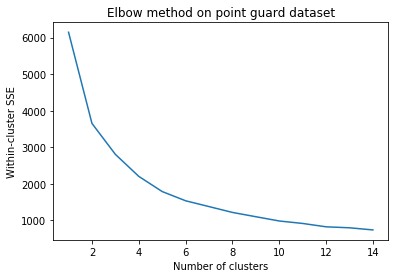

In [7]:
#Elbow method
distortations = {}
for k in range(1,15):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(pg_df_1)
  distortations[k] = kmeans.inertia_

plt.plot(list(distortations.keys()),list(distortations.values()))
plt.title('Elbow method on point guard dataset')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster SSE')
plt.show()

Clusters: [[16.77906977  8.47325581  1.6872093 ]
 [21.83902439  6.29268293  3.15121951]
 [11.86455696  6.60253165  1.41012658]
 [15.39642857  4.12321429  4.88571429]]


red: Cluster 0
blue: Cluster 1
green: Cluster 2
yellow: Cluster 3


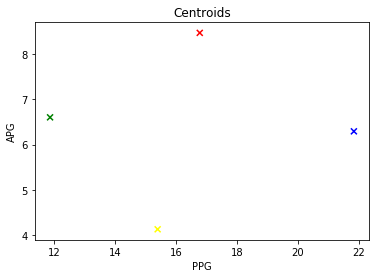

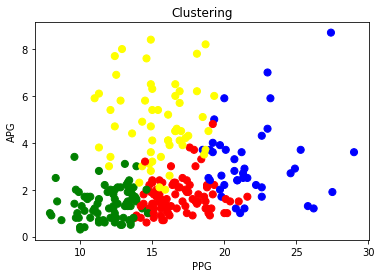

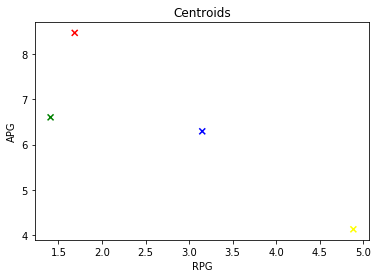

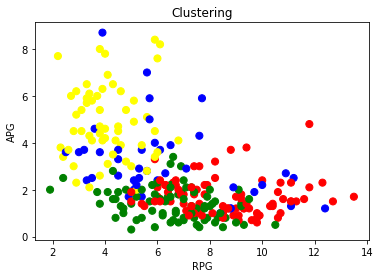

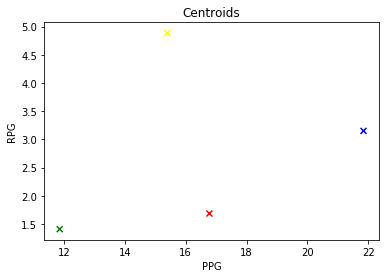

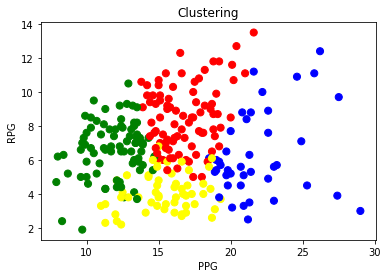

In [8]:
centroids = clustering.cluster_centers_
print('Clusters: {}'.format(centroids))
print('\n')
t = np.arange(num_clusters)
for i in range(len(centroids)):
    print('{}: Cluster {}'.format(color_theme[i], i))

plt.scatter(centroids[:,0], centroids[:,1], marker="x", c=color_theme[t])
plt.title('Centroids')
plt.xlabel('PPG')
plt.ylabel('APG')
plt.show()

plt.scatter(x=pg_df_1.ppg,y=pg_df_1.apg,c=color_theme[clustering.labels_],s=50)
plt.title('Clustering')
plt.xlabel('PPG')
plt.ylabel('APG')
plt.show()

plt.scatter(centroids[:,2], centroids[:,1], marker="x", c=color_theme[t])
plt.title('Centroids')
plt.xlabel('RPG')
plt.ylabel('APG')
plt.show()

plt.scatter(x=pg_df_1.rpg,y=pg_df_1.apg,c=color_theme[clustering.labels_],s=50)
plt.title('Clustering')
plt.xlabel('RPG')
plt.ylabel('APG')
plt.show()

plt.scatter(centroids[:,0], centroids[:,2], marker="x", c=color_theme[t])
plt.title('Centroids')
plt.xlabel('PPG')
plt.ylabel('RPG')
plt.show()

plt.scatter(x=pg_df_1.ppg,y=pg_df_1.rpg,c=color_theme[clustering.labels_],s=50)
plt.title('Clustering')
plt.xlabel('PPG')
plt.ylabel('RPG')
plt.show()

Clusters: [[16.77906977  8.47325581  1.6872093 ]
 [21.83902439  6.29268293  3.15121951]
 [11.86455696  6.60253165  1.41012658]
 [15.39642857  4.12321429  4.88571429]]


red: Cluster 0
blue: Cluster 1
green: Cluster 2
yellow: Cluster 3


Text(0.5, 0, 'RPG')

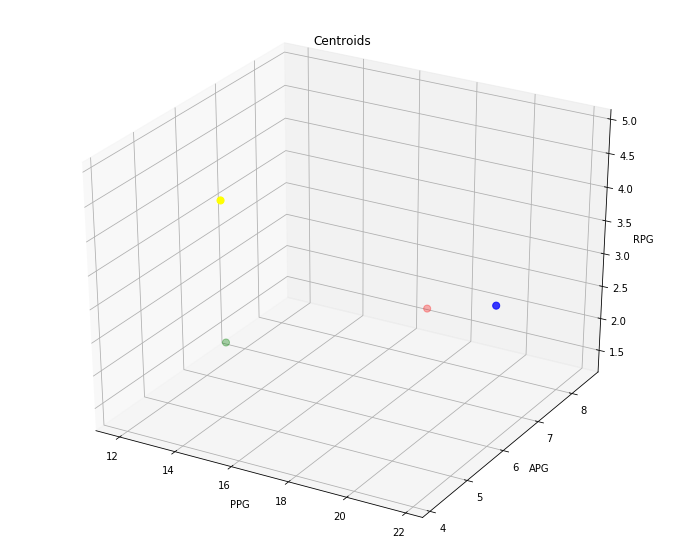

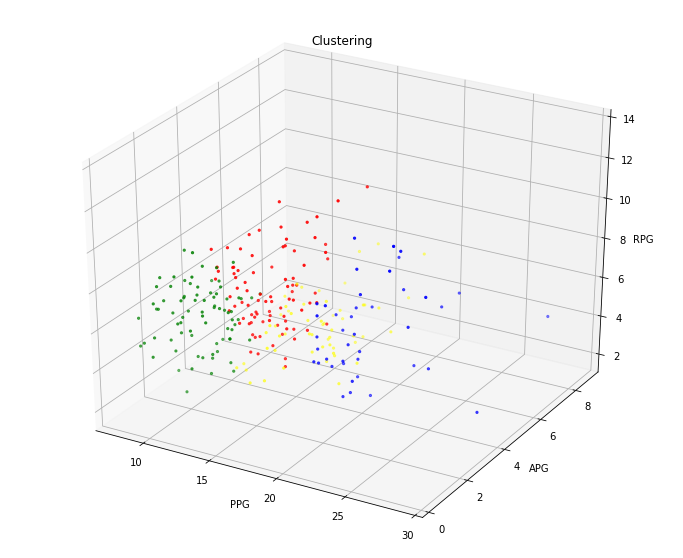

In [9]:
centroids = clustering.cluster_centers_
print('Clusters: {}'.format(centroids))
print('\n')
t = np.arange(num_clusters)
for i in range(len(centroids)):
    print('{}: Cluster {}'.format(color_theme[i], i))

fig = plt.figure(figsize=(12,10))
centroid_3d = fig.add_subplot(111, projection='3d')
centroid_3d.scatter(xs=centroids[:,0],ys=centroids[:,1], zs = centroids[:,2], s=50, c=color_theme[t])
centroid_3d.set_title('Centroids')
centroid_3d.set_xlabel('PPG')
centroid_3d.set_ylabel('APG')
centroid_3d.set_zlabel('RPG')

fig2 = plt.figure(figsize=(12,10))
ax = fig2.add_subplot(111, projection='3d')
ax.scatter(xs=pg_df_1.ppg,ys=pg_df_1.apg, zs = pg_df_1.rpg, c=color_theme[clustering.labels_],s=5)
ax.set_title('Clustering')
ax.set_xlabel('PPG')
ax.set_ylabel('APG')
ax.set_zlabel('RPG')

In [10]:
cluster_counts = {}
for i in range(len(clustering.labels_)):
    if clustering.labels_[i] not in cluster_counts:
        cluster_counts[clustering.labels_[i]] = 1
    else:
        cluster_counts[clustering.labels_[i]] += 1
print('In Total:')
for i in cluster_counts:
    print('{} players were drafted in the top {} picks of their respective draft that fall in cluster {}'.format(cluster_counts[i], max_draft_selection, i))
print('\n')
        
decade_counts = {1990: {}, 2000: {}, 2010: {}}
for i in range(num_clusters):  
    decade_counts[1990.0][i] = 0
    decade_counts[2000.0][i] = 0
    decade_counts[2010.0][i] = 0

for i in range(len(clustering.labels_)):
    if (1990.0 <= pg_df_1_with_years.iloc[i][3] < 2000.0):  
        decade_counts[1990][clustering.labels_[i]] += 1
    elif (2000.0 <= pg_df_1_with_years.iloc[i][3] < 2010.0):  
        decade_counts[2000][clustering.labels_[i]] += 1
    elif (2010.0 <= pg_df_1_with_years.iloc[i][3] < 2020.0):  
        decade_counts[2010][clustering.labels_[i]] += 1
    
for i in decade_counts:
    print('In the {}\'s'.format(i))
    for j in decade_counts[i]:
        print('     {} players were drafted in the top {} picks of their respective draft that fall in cluster {}'.format(decade_counts[i][j],max_draft_selection,  j))

In Total:
86 players were drafted in the top 10 picks of their respective draft that fall in cluster 0
56 players were drafted in the top 10 picks of their respective draft that fall in cluster 3
41 players were drafted in the top 10 picks of their respective draft that fall in cluster 1
79 players were drafted in the top 10 picks of their respective draft that fall in cluster 2


In the 1990's
     40 players were drafted in the top 10 picks of their respective draft that fall in cluster 0
     22 players were drafted in the top 10 picks of their respective draft that fall in cluster 1
     17 players were drafted in the top 10 picks of their respective draft that fall in cluster 2
     17 players were drafted in the top 10 picks of their respective draft that fall in cluster 3
In the 2000's
     21 players were drafted in the top 10 picks of their respective draft that fall in cluster 0
     11 players were drafted in the top 10 picks of their respective draft that fall in cluster 1


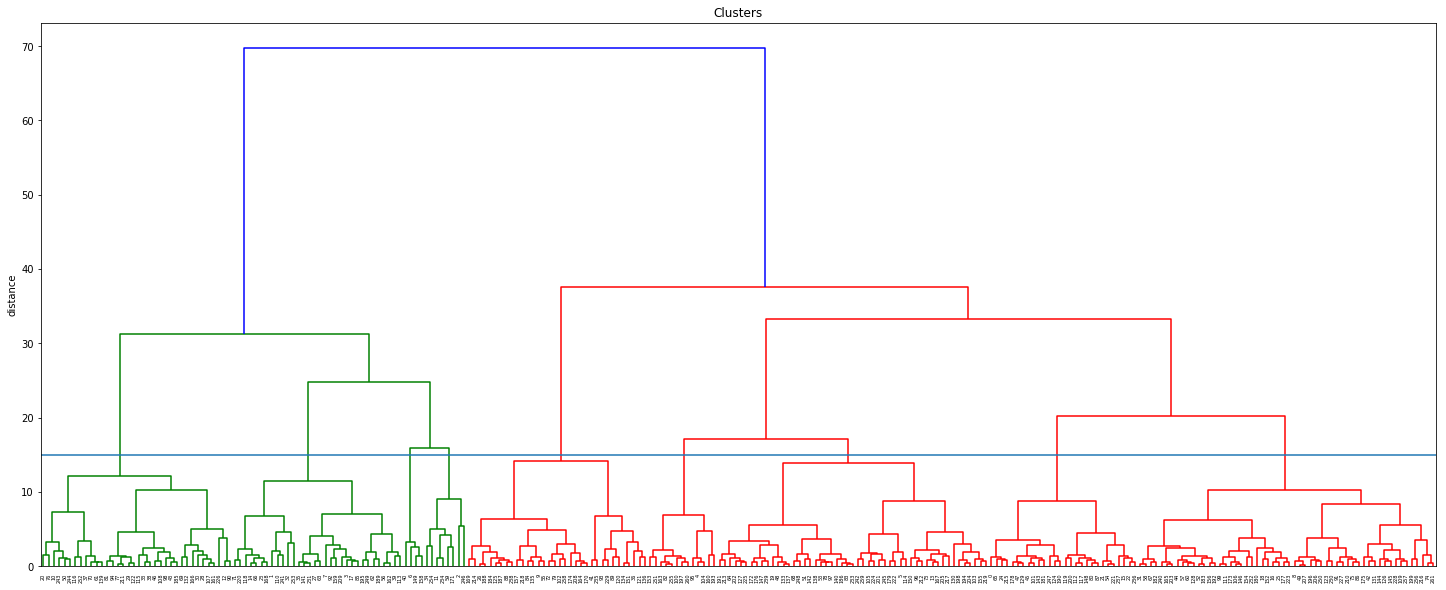

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(pg_df_1,'ward')

plt.figure(figsize=(25,10))
plt.title('Clusters')
plt.ylabel('distance')
dendrogram(Z)

plt.axhline(y=15)
plt.show()